## <div align="center">   **Comparative Analysis of k-Nearest Neighbors and Random Forest**

The goal of this analysis is to compare the performance of the k-Nearest Neighbors (kNN) algorithm and the Random Forest algorithm on a dataset. 
- The kNN algorithm is a supervised learning algorithm that classifies data points by assigning labels based on the majority vote of their k nearest neighbors in the feature space.
- The Random Forest is a supervised learnng algorithm that constructs an ensemble of decision trees and makes predictions by averaging the individual predictions of multiple trees.

# Exploratory Data Analysis (EDA)

First of all we explore the dataset, we will examine the dataset's characteristics, relationships between variables to gain insights and identify patterns or potential issues before proceeding with the modeling process.

Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

Read the dataset

In [9]:
df = pd.read_csv('mldata_0003158575.csv')
df.head()

Unnamed: 0  label  feature_1  feature_2  feature_3  feature_4  feature_5   
0           0      1  -6.120679   1.501698  -3.149420  -4.332669  -0.304959  \
1           1      1  -2.659251   4.173896   1.989631   0.401171   1.961037   
2           2      2   1.757553   0.084182  -0.019762  -2.256871   1.194474   
3           3      0   6.236460   3.461854  -0.224854   2.789543   0.323379   
4           4      1  -3.866978   7.443443   1.937008   4.894649   4.644852   

   feature_6  feature_7  feature_8  ...  feature_16  feature_17  feature_18   
0  -6.278528  -2.746005  -3.426688  ...   -6.352674    1.616892   -6.251784  \
1  -1.486706   2.981763  -2.142774  ...    1.949587   -1.120648    2.002151   
2  -1.530702   0.627691  -0.660560  ...   -1.285168    1.656348    1.082108   
3   6.429671   1.261870   3.254630  ...    2.715511    0.616395    3.325517   
4   0.438709   2.984306   3.679496  ...   -1.722039    3.400403   -0.060704   

   feature_19  feature_20  feature_21  feature_22  feature_23  feature_24   
0   -2.531601   -2.288464   -5.210649   -1.868562   -0.727702   -1.558468  \
1    2.249857   -1.024779    1.535577    3.237842    1.494706    1.794598   
2    0.424266   -0.642353   -1.783556    2.342238    1.583893    3.314791   
3    0.878215    2.030215    3.119818   -2.198187    4.431482    2.368186   
4   -1.627076    1.678564   -0.263248    0.407693   -1.007771    2.644552   

   feature_25  
0   -0.313174  
1   -0.827965  
2   -0.362413  
3    3.283664  
4    7.330145  

[5 rows x 27 columns]

Explore dimension of the dataset

In [3]:
print('N of Samples:', df.shape[0])
print('No of Features:', df.shape[1]-2)

N of Samples: 1400
No of Features: 25


Check for NaN values and duplicates

In [4]:
df.isna().sum()

Unnamed: 0    0
label         0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
dtype: int64

In [5]:
duplicate_cols = []
for i in df.duplicated():
    if i == True:
        duplicate_cols.append(i)
print(duplicate_cols)

[]


NaN values or duplicate columns are not present in the dataset

We remove the column 'Unnamed: 0' form the dataset since we don't really need it.

In [10]:
df.drop(['Unnamed: 0'], axis = 1, inplace= True)

Check correlation matrix

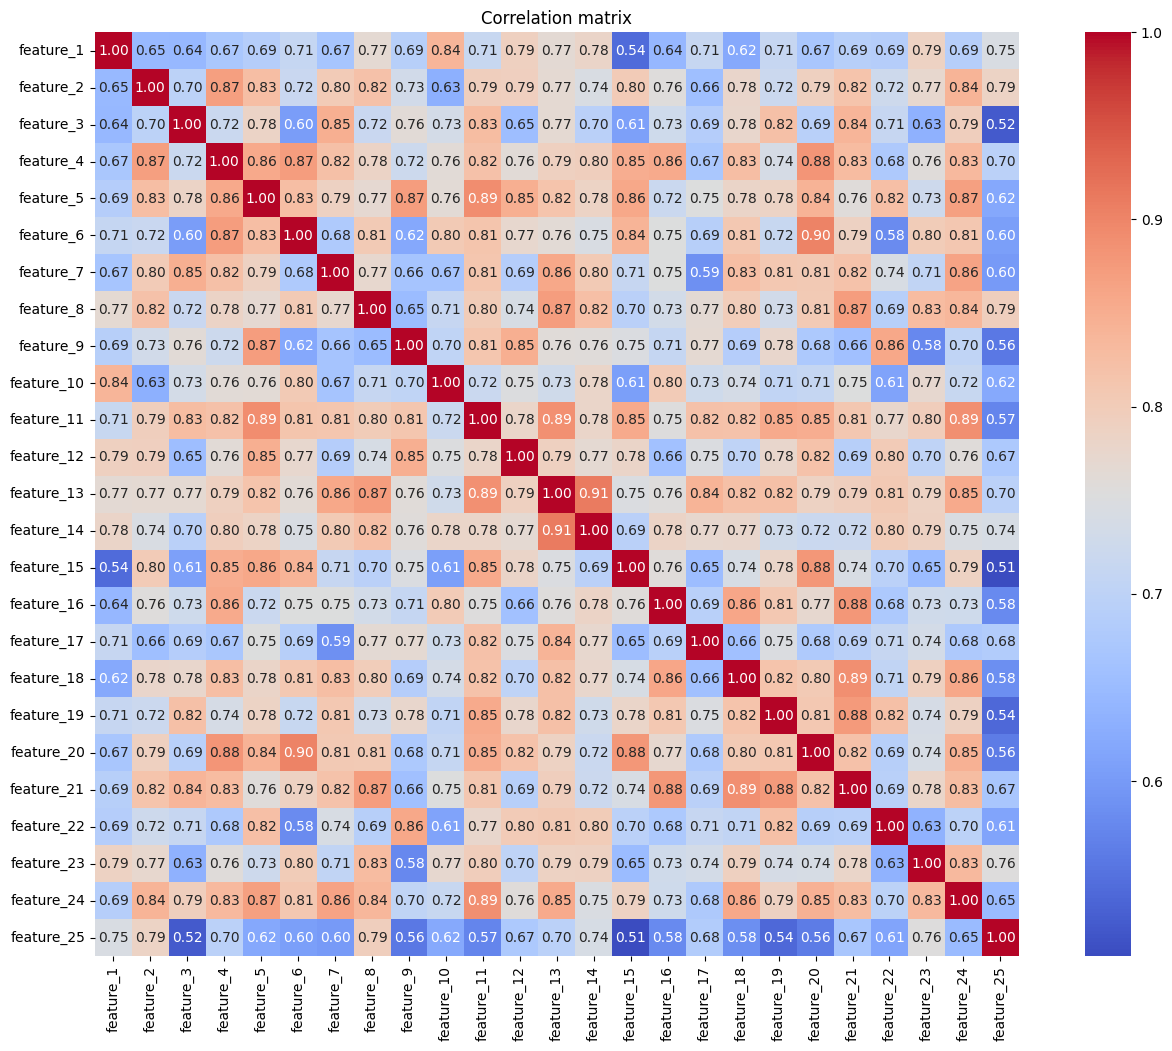

In [7]:
plt.figure(figsize=(17, 12))
corr = df.drop(['label'], axis = 1).corr()
sns.heatmap(corr, vmax=1, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 10}, cmap = 'coolwarm');
plt.title('Correlation matrix');

We see that some values are highly correlated, this might be a problem when training a classifier on this dataset, we will deal with this once the data exploration step is over

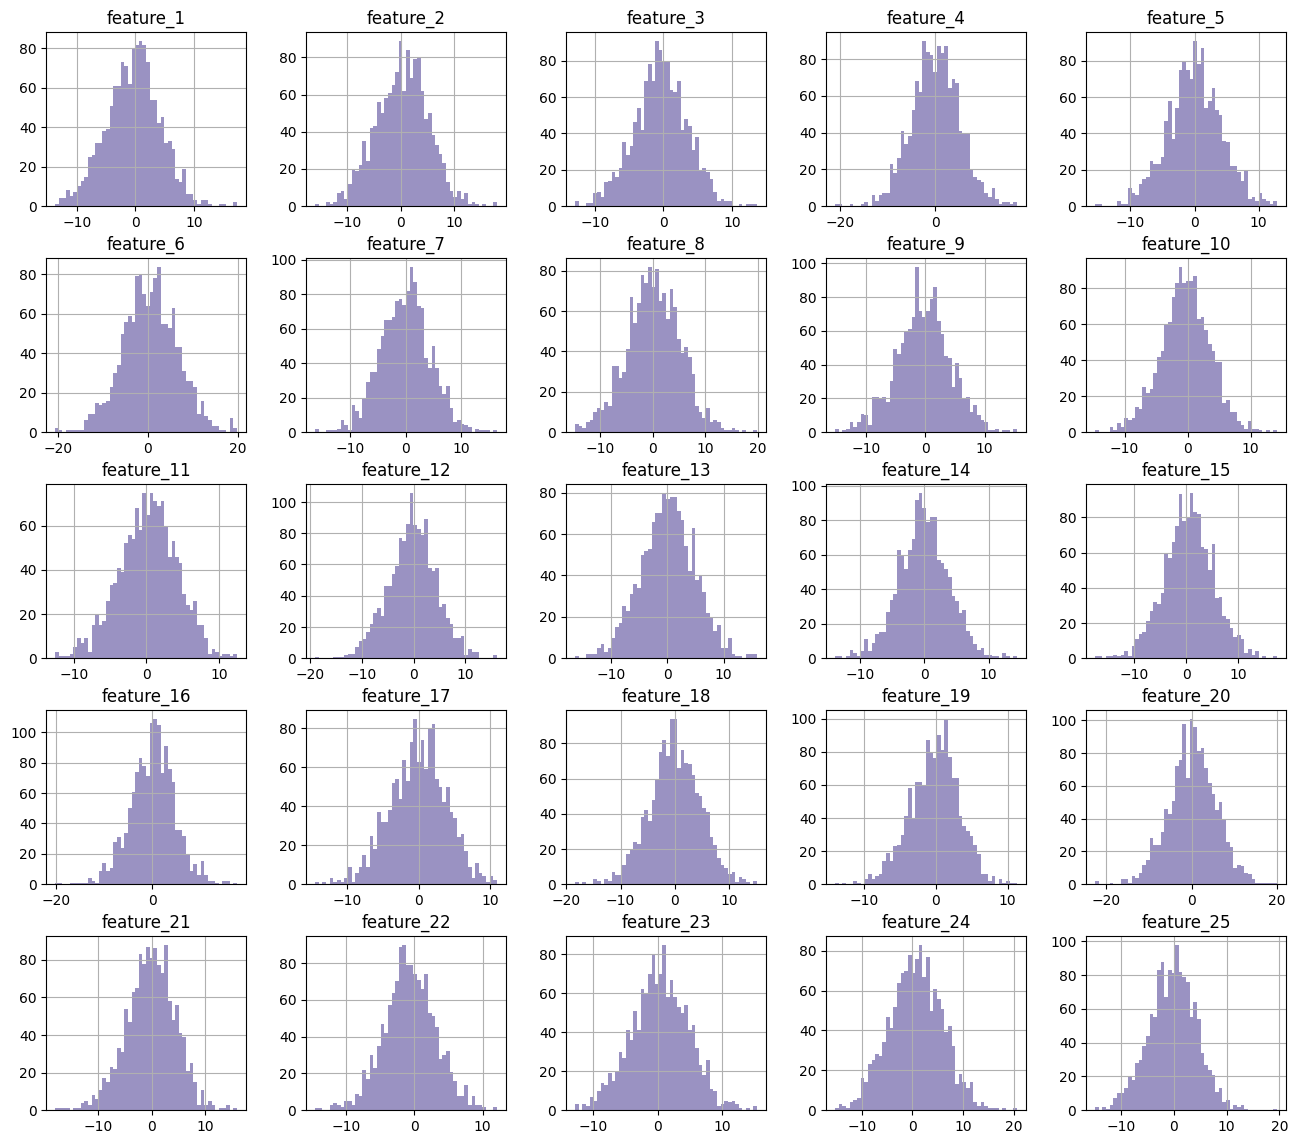

In [371]:
df.drop(['label'], axis = 1).hist(bins=50, figsize=(16, 14), color = '#9A92C2');

In [494]:
skew = df.drop(['label'], axis = 1).skew().mean()
kurtosis = df.drop(['label'], axis = 1).kurtosis().mean()
print('Skewness: ' +str(skew))
print('Kurtosis: '+str(kurtosis))

Skewness: -0.06745078268678499
Kurtosis: 0.226619551604797


From the plot and the skewness and kurtosis tests we deduce that the data is normal.
However, as data was randomly generated some noise is present and some features take values in slightly different ranges, together with high correlation we will adress these in the 'Transformation Pipelines' part

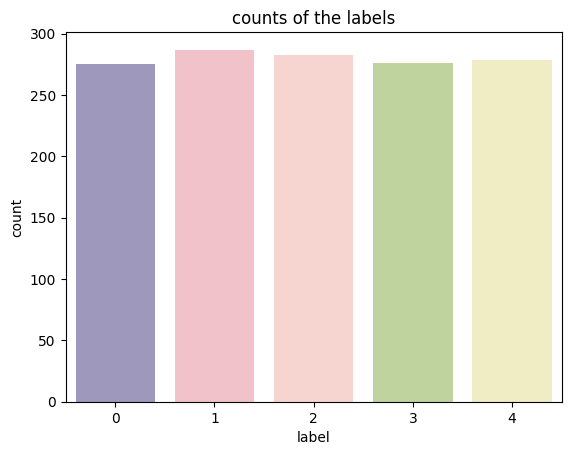

In [495]:
sns.countplot(x="label", data = df, palette = 	['#9A92C2', '#FABAC5', '#FCD1CA', '#C1DC95', '#F8F2BB','#99C66F'])
plt.title('counts of the labels');

The 5 labels are evenly distributed among the dataset

We perform PCA for data visualization

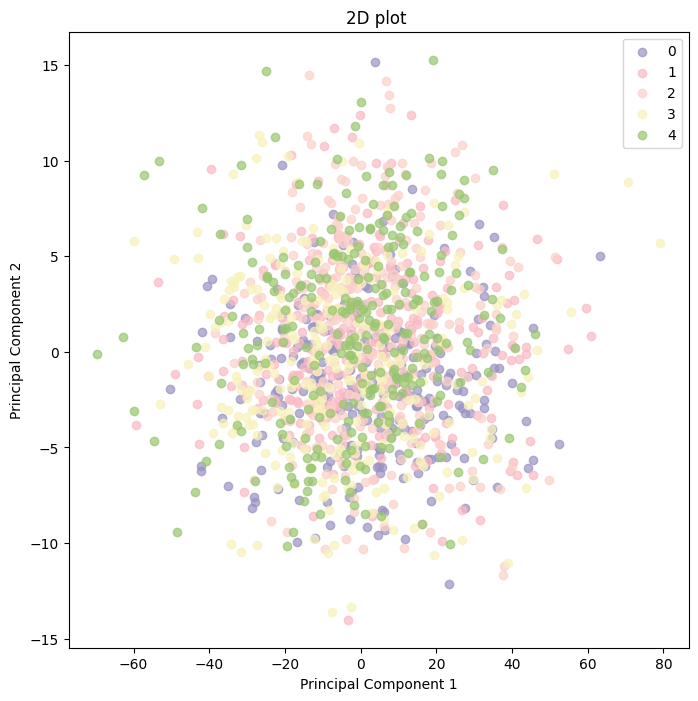

In [496]:
pca = PCA(n_components=2)
Xp = pca.fit_transform(df.drop(['label'], axis = 1))

labels = {0: [], 1:[], 2:[], 3:[], 4:[]}    
for i in range(df.shape[0]):
  if df['label'][i] == 0:
    labels[0].append(i)
  if df['label'][i] == 1:
    labels[1].append(i)
  if df['label'][i] == 2:
    labels[2].append(i)
  if df['label'][i] == 3:
    labels[3].append(i)
  if df['label'][i] == 4:
    labels[4].append(i)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D plot ')

ax.scatter(Xp[labels[0],0], Xp[labels[0],1],label="0", color = '#9A92C2', alpha = 0.7)
ax.scatter(Xp[labels[1],0], Xp[labels[1],1] ,c='#FABAC5', alpha = 0.7, label="1")
ax.scatter(Xp[labels[2],0], Xp[labels[2],1], c='#FCD1CA', alpha = 0.7, label="2")
ax.scatter(Xp[labels[3],0], Xp[labels[3],1], c='#F8F2BB', alpha = 0.7, label="3")
ax.scatter(Xp[labels[4],0], Xp[labels[4],1], c='#99C66F', alpha = 0.7, label="4")
ax.legend()

plt.show()

Clearly the data is not learly separable, neither eveident clusters are present and overall the scatter plot doesn't tell us much.

# Transformation Pipeline

From EDA, three main problems arose:
- High Correlation of data
- Gaussian noise
- Features take values in sligthly different ranges

We will build a pipeline in order to deal with these.

To deal with the last instance, we have simple solution, we scale the data. We will us MinMaxScaler which scales the data st they only take values between 0 and 1, it will be the first thing added to the pipeline.

Next we will deal with Gaussian Noise, we suspect that it is due to the presence of outliers, so, after scaling the data we plot a boxplot to check wether they're actually present.

In [11]:
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df.drop('label', axis = 1))
df1 = pd.DataFrame(df1)
df1['label'] = df['label']
df1

0         1         2         3         4         5         6   
0     0.244706  0.515069  0.366608  0.436415  0.535572  0.354900  0.413114  \
1     0.355877  0.593884  0.560856  0.559963  0.615419  0.473230  0.587658   
2     0.497733  0.473261  0.484905  0.490591  0.588408  0.472144  0.515921   
3     0.641584  0.572883  0.477152  0.622298  0.557713  0.668720  0.535247   
4     0.317088  0.690317  0.558867  0.677239  0.709987  0.520777  0.587735   
...        ...       ...       ...       ...       ...       ...       ...   
1395  0.352156  0.384518  0.321427  0.491103  0.430668  0.419525  0.459986   
1396  0.341782  0.538521  0.404702  0.515771  0.517425  0.461263  0.462602   
1397  0.555046  0.442356  0.439397  0.509513  0.623258  0.669236  0.443608   
1398  0.560447  0.528150  0.527295  0.486180  0.650134  0.467573  0.460926   
1399  0.602422  0.585701  0.531920  0.548514  0.578306  0.485725  0.539415   

             7         8         9  ...        16        17        18   
0     0.327114  0.379263  0.284619  ...  0.632217  0.360983  0.452864  \
1     0.364155  0.549069  0.432050  ...  0.524665  0.607064  0.642124   
2     0.406916  0.575509  0.490562  ...  0.633767  0.579634  0.569863   
3     0.519867  0.479726  0.669329  ...  0.592909  0.646518  0.587831   
4     0.532125  0.595415  0.457036  ...  0.702287  0.545562  0.488667   
...        ...       ...       ...  ...       ...       ...       ...   
1395  0.263446  0.363334  0.377471  ...  0.343809  0.430145  0.516337   
1396  0.419395  0.452659  0.460381  ...  0.684914  0.529881  0.321705   
1397  0.448458  0.548560  0.559213  ...  0.569082  0.565044  0.612245   
1398  0.491180  0.729465  0.600705  ...  0.779159  0.541386  0.497041   
1399  0.472259  0.650594  0.604028  ...  0.470805  0.608135  0.511679   

            19        20        21        22        23        24  label  
0     0.477351  0.376645  0.474112  0.428427  0.381301  0.423034      1  
1     0.507012  0.575979  0.666085  0.507373  0.474829  0.408091      1  
2     0.515988  0.477907  0.632415  0.510542  0.517232  0.421605      2  
3     0.578717  0.622790  0.461720  0.611696  0.490828  0.527438      0  
4     0.570463  0.522829  0.559687  0.418479  0.498537  0.644894      1  
...        ...       ...       ...       ...       ...       ...    ...  
1395  0.475258  0.458467  0.469223  0.366764  0.375908  0.317433      3  
1396  0.462029  0.359325  0.421159  0.437702  0.460477  0.575981      1  
1397  0.596091  0.533793  0.608465  0.471682  0.422615  0.429417      4  
1398  0.455695  0.432027  0.701837  0.548839  0.499198  0.499614      1  
1399  0.494375  0.543087  0.627956  0.418377  0.496283  0.551355      2  

[1400 rows x 26 columns]

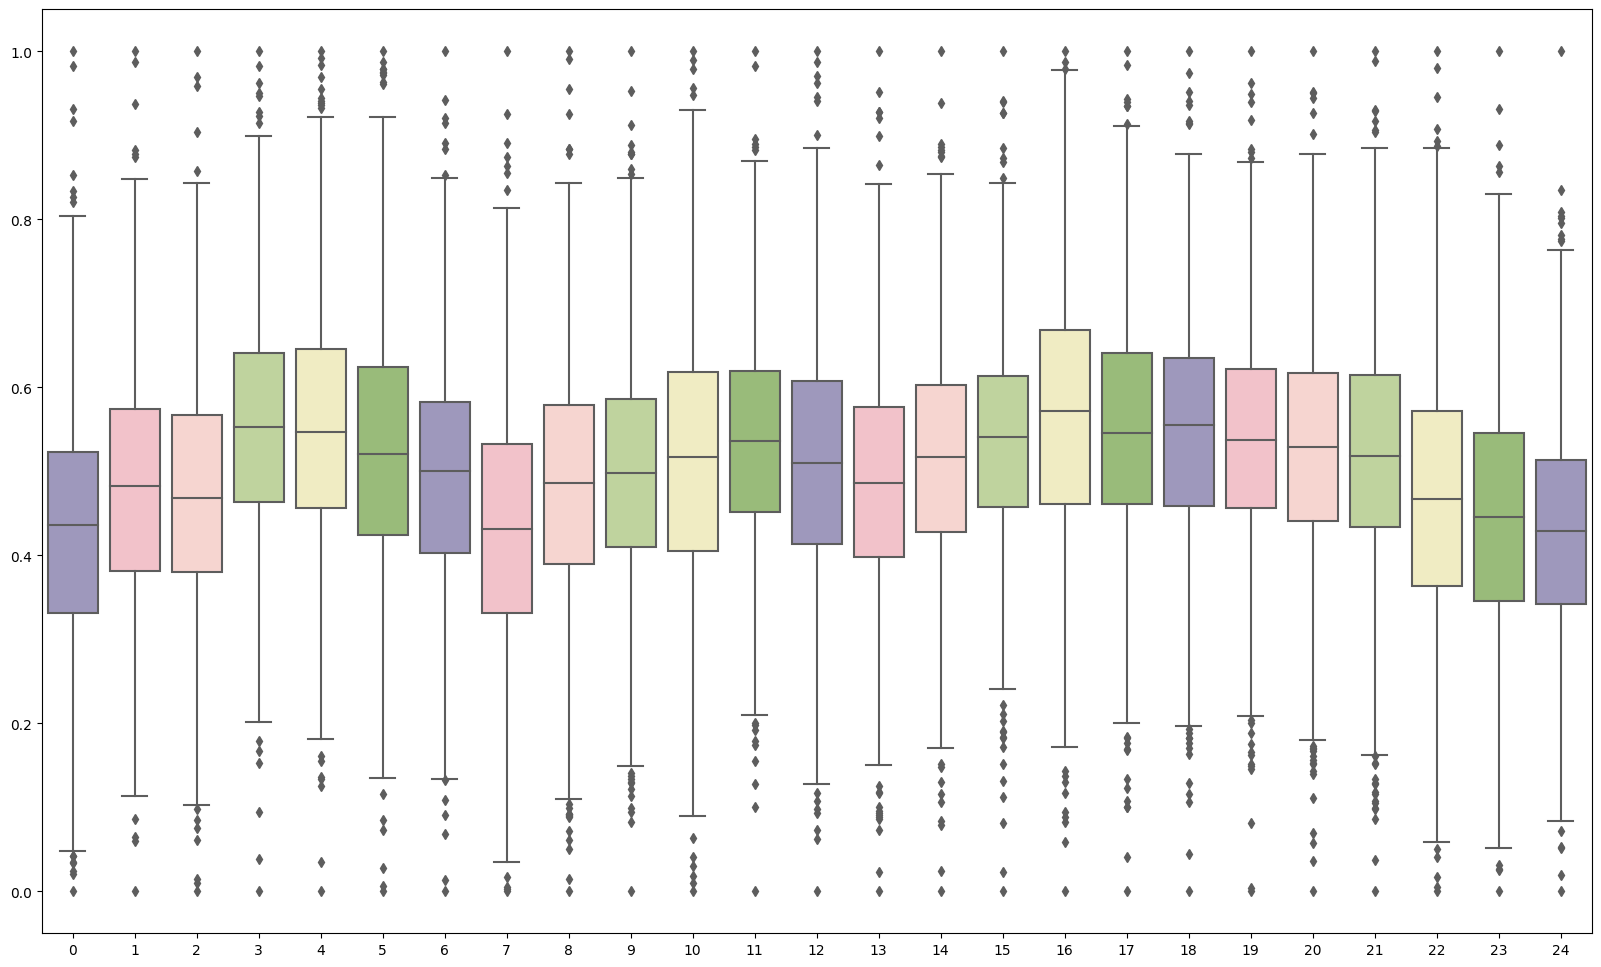

In [9]:
plt.figure(figsize = (20,12))
sns.boxplot(df1.drop('label', axis = 1), palette=['#9A92C2', '#FABAC5', '#FCD1CA', '#C1DC95', '#F8F2BB','#99C66F']);

Indeed outliers are present, we proceed with removal.
The function employs a statistical method to remove outliers. The function remove_outlier(df) iterates over each column and calculates the first quartile (q1), third quartile (q3), and interquartile range (iqr) using the quantile() function. The interquartile range, representing the range between q1 and q3, serves as a measure of statistical dispersion. Based on the computed iqr, the function determines the lower and upper bounds for outlier removal. Rows in the DataFrame that fall outside the range of (q1 - iqr, q3 + iqr) for each column are excluded.

In [12]:
df1.set_index('label')
def remove_outlier(df):
    if type(df) is not pd.DataFrame:
        df = pd.DataFrame(df)
    for i in range(0, df.shape[1]-1):

        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1 
        low  = q1 - iqr
        high = q3 + iqr
        df1 = df.loc[(df[i] > low) & (df[i] < high)]
        return df1

df2 = remove_outlier(df1)
    
df2.set_index('label', inplace = True)
df2

0         1         2         3         4         5         6    
label                                                                         
1      0.244706  0.515069  0.366608  0.436415  0.535572  0.354900  0.413114  \
1      0.355877  0.593884  0.560856  0.559963  0.615419  0.473230  0.587658   
2      0.497733  0.473261  0.484905  0.490591  0.588408  0.472144  0.515921   
0      0.641584  0.572883  0.477152  0.622298  0.557713  0.668720  0.535247   
1      0.317088  0.690317  0.558867  0.677239  0.709987  0.520777  0.587735   
...         ...       ...       ...       ...       ...       ...       ...   
3      0.352156  0.384518  0.321427  0.491103  0.430668  0.419525  0.459986   
1      0.341782  0.538521  0.404702  0.515771  0.517425  0.461263  0.462602   
4      0.555046  0.442356  0.439397  0.509513  0.623258  0.669236  0.443608   
1      0.560447  0.528150  0.527295  0.486180  0.650134  0.467573  0.460926   
2      0.602422  0.585701  0.531920  0.548514  0.578306  0.485725  0.539415   

             7         8         9   ...        15        16        17   
label                                ...                                 
1      0.327114  0.379263  0.284619  ...  0.365214  0.632217  0.360983  \
1      0.364155  0.549069  0.432050  ...  0.585976  0.524665  0.607064   
2      0.406916  0.575509  0.490562  ...  0.499962  0.633767  0.579634   
0      0.519867  0.479726  0.669329  ...  0.606343  0.592909  0.646518   
1      0.532125  0.595415  0.457036  ...  0.488345  0.702287  0.545562   
...         ...       ...       ...  ...       ...       ...       ...   
3      0.263446  0.363334  0.377471  ...  0.528502  0.343809  0.430145   
1      0.419395  0.452659  0.460381  ...  0.412463  0.684914  0.529881   
4      0.448458  0.548560  0.559213  ...  0.475928  0.569082  0.565044   
1      0.491180  0.729465  0.600705  ...  0.558764  0.779159  0.541386   
2      0.472259  0.650594  0.604028  ...  0.556251  0.470805  0.608135   

             18        19        20        21        22        23        24  
label                                                                        
1      0.452864  0.477351  0.376645  0.474112  0.428427  0.381301  0.423034  
1      0.642124  0.507012  0.575979  0.666085  0.507373  0.474829  0.408091  
2      0.569863  0.515988  0.477907  0.632415  0.510542  0.517232  0.421605  
0      0.587831  0.578717  0.622790  0.461720  0.611696  0.490828  0.527438  
1      0.488667  0.570463  0.522829  0.559687  0.418479  0.498537  0.644894  
...         ...       ...       ...       ...       ...       ...       ...  
3      0.516337  0.475258  0.458467  0.469223  0.366764  0.375908  0.317433  
1      0.321705  0.462029  0.359325  0.421159  0.437702  0.460477  0.575981  
4      0.612245  0.596091  0.533793  0.608465  0.471682  0.422615  0.429417  
1      0.497041  0.455695  0.432027  0.701837  0.548839  0.499198  0.499614  
2      0.511679  0.494375  0.543087  0.627956  0.418377  0.496283  0.551355  

[1326 rows x 25 columns]

Now we turn to the problem of high correlation. To solve this problem we perform PCA, while keeping 95% of the variance. In this way we reduce the dimensionality of the dataset. This reduction in dimensionality can help simplify the dataset and remove noise and redundant information

In [13]:
pca = PCA(n_components=0.95)
featuresdf_red = pca.fit_transform(df2)
featuresdf_red = pd.DataFrame(featuresdf_red)
featuresdf_red['label'] = df2.index
featuresdf_red

0         1         2         3         4         5         6   
0     0.431089 -0.069124  0.025881 -0.077047 -0.188640  0.198087 -0.024608  \
1    -0.179006 -0.149793 -0.152271  0.064773 -0.122236  0.006319  0.032645   
2    -0.137078 -0.156224  0.083095 -0.000459 -0.020628  0.102866 -0.087771   
3    -0.323961  0.213981  0.100668 -0.004855  0.100514 -0.083066 -0.051100   
4    -0.264719 -0.050243  0.036147 -0.071753 -0.287350 -0.002238  0.033168   
...        ...       ...       ...       ...       ...       ...       ...   
1321  0.454151 -0.002490 -0.149926 -0.036179 -0.034430 -0.055157  0.009631   
1322  0.155163  0.057973  0.196733 -0.069512 -0.163660  0.103861 -0.018257   
1323 -0.152130 -0.053500  0.059059 -0.151279  0.089657 -0.004308 -0.059694   
1324 -0.289813 -0.231773  0.353032 -0.021010 -0.021913  0.030880 -0.023801   
1325 -0.178833 -0.085098  0.138383  0.035831 -0.103689 -0.229576 -0.098826   

             7         8         9  label  
0    -0.129875 -0.009801  0.041175      1  
1     0.012611 -0.044724  0.129473      1  
2     0.043815 -0.030249  0.068243      2  
3    -0.012923 -0.047102 -0.008081      0  
4    -0.147966  0.184477 -0.069167      1  
...        ...       ...       ...    ...  
1321  0.096927 -0.083910  0.041193      3  
1322 -0.059285  0.224342  0.023259      1  
1323  0.082892 -0.081580 -0.041303      4  
1324  0.007607  0.109300  0.112680      1  
1325  0.000191 -0.007762 -0.006298      2  

[1326 rows x 11 columns]

After PCA 10 features are left in the dataset, they're not correlated and the Gaussian noise has been reduced.

We will create a pipeline to streamline the data preparation process for the classifier when working with new datasets. The pipeline incorporates three steps:

- MinMaxScaler()

- PCA with n_components=10

We don't include outlier detection in the pipeline, since it is olny useful for training.

By integrating these processes into the pipeline, we ensure that the data fed to the classifier for prediction always possesses 10 features, regardless of the original dataset's dimensionality. This enables efficient and reliable utilization of the classifier on new datasets, reducing the need for extensive data preparation for each individual dataset.

In [14]:
pipeline = Pipeline([
    ('standardize', MinMaxScaler()),
    ('Dimensionality reduction', PCA(n_components=10)),
])

We define this dict to keep track of the progress of the models, it will help us decide in the end which is the best classifier

In [15]:
results = {'KNN': [], 'RandomForest': []}

# KNN

Before starting to implement the model and measuring its accuracy, we must keep in mind that KNN does not behave well in high dimensions. As dimension increases, data points drift farther apart, so even the nearest neighbor to a point will tend to be very far away. 
For this reason we don't expect the model to have high accuracy from the beginning.

Split train and test sets

In [18]:
X = featuresdf_red.drop(['label'], axis = 1)
y = featuresdf_red["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

We first implement KNN, without adjusting any parameter and then check how the model performs.

In [643]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy on test: ' +str(accuracy_score(y_test, y_pred)))
results['KNN'].append(accuracy_score(y_test, y_pred))

Accuracy on test: 0.42105263157894735


The accuracy is quite satisfactory, considering it is at least twice as good as a random classifier for 5 labels, but there is a margin for improvement. We know that for KNN, the paramter k highly affects the performance of the model, for this reason it needs to be studied in depth.
We check the accuracy of the model for a range of ks.

### **N neighbors parameter**

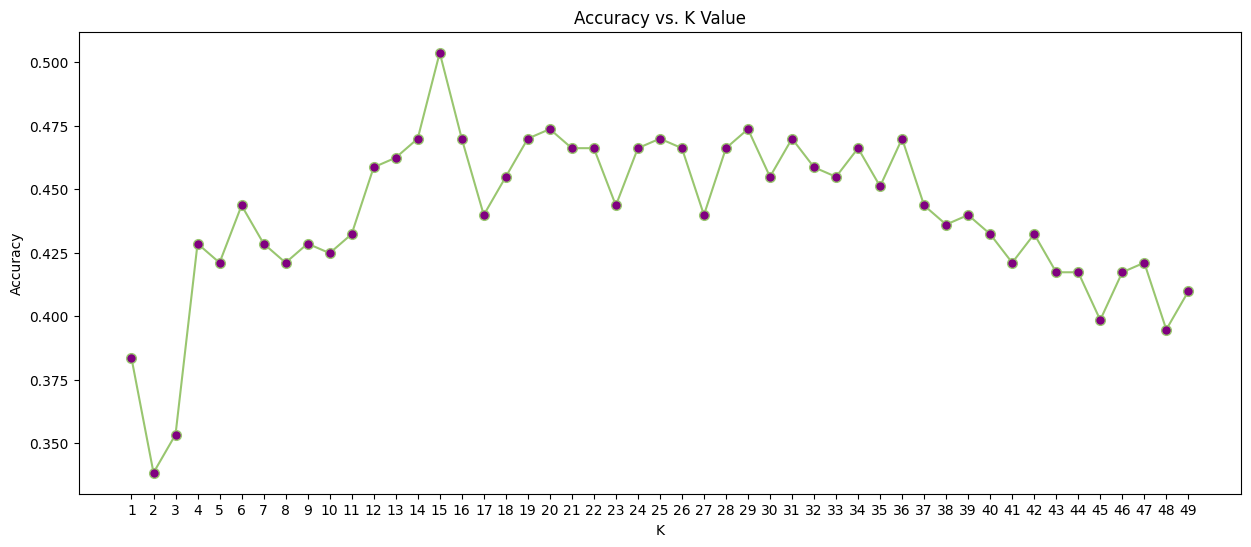

In [559]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(15,6));
plt.plot(range(1,50),acc,color = '#99C66F',  
         marker='o',markerfacecolor='purple', markersize=7);
plt.title('Accuracy vs. K Value');
plt.xlabel('K');
plt.ylabel('Accuracy');
plt.xticks(np.arange(1,50, step = 1));

From this graph it is evident which k parameters perform best on the model, we can start to gain insights on how we're going to choose our parameter. As expected, low values of k give poor performances, we know that small values are sensible to noise and outliers, which even after we have modified the dataset are still present and determine the poor performances of the model.

The highest accuracy in this range is achieved at k = 15, but it would not be natural to just choose it as best k since this values of k is the one that performs best specifically on this test set, a much more reliable tool for choosing the best k is cross validation. 

Cross validation performs multiple splits of the dataset and finds the optimal parameters for all possible splits, not only for a specific one as choosing k from this graph would do. We will use it later. 

Now we plot train set accuracy and test set accuracy for all possibile values of k, this graph is useful as it gives an idea on how much the model overfits.

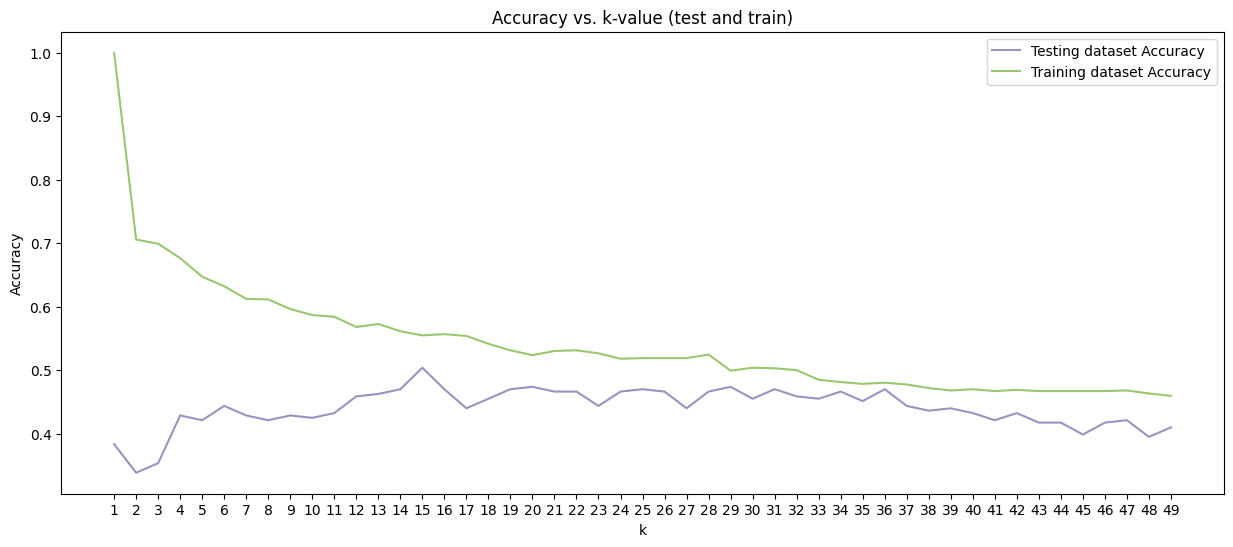

In [560]:
neighbors = np.arange(1, 50, step = 1)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
diff = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    diff[i] = train_accuracy[i]-test_accuracy[i]



plt.figure(figsize=(15,6))
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy', color = '#9A92C2')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy', color = '#99C66F')
plt.title('Accuracy vs. k-value (test and train)')
plt.xticks(np.arange(1,50))
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

We see from the graph that if our only choice was to minimize overfitting, we would choose an high value of k, sacrificing accuracy, but we won't do this since our primal goal is to maximize generalization error.

### **Hyper parameters tuning**

We finally turn to GridSearchCV, a technique that systematically explores a parameter grid to find the best combination of hyperparameters for our model. GridSearchCV is precise and finds the best parameters, since it integrates cross-validation into the parameter grid search process. We consider the following parameters: number of neighbors (n_neighbors), weight function (weights), distance metric (metric), and algorithm (algorithm) used for nearest neighbor computation. GridSearchCV helps optimize the model's performance by exhaustively searching through the parameter space and identifying the best hyperparameter values based on a specified scoring metric, we use accuracy.

In [400]:
gs = GridSearchCV(KNeighborsClassifier(), {'n_neighbors' : np.arange(1,200, step = 1), 
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'algorithm' : ["auto", "ball_tree", "kd_tree", 'brute']
               }, cv = 5, scoring = 'accuracy', n_jobs=-1)
g_res =gs.fit(X_train,y_train)
g_res.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 10,
 'weights': 'distance'}

In [401]:
x = pd.DataFrame(gs.cv_results_)
x.sort_values(by='mean_test_score', ascending=False, inplace =True)
x

mean_fit_time  std_fit_time  mean_score_time  std_score_time   
3203       0.006508      0.001185         0.014318        0.003246  \
4397       0.003217      0.003940         0.098051        0.006360   
815        0.004770      0.003215         0.014937        0.002702   
2009       0.005273      0.003418         0.017842        0.001018   
813        0.008455      0.002214         0.012322        0.001624   
...             ...           ...              ...             ...   
394        0.007351      0.002428         0.040720        0.005612   
1588       0.006944      0.001863         0.045170        0.002901   
1986       0.007721      0.001954         0.046060        0.007447   
4374       0.008431      0.000914         0.131680        0.005889   
3976       0.008481      0.000604         0.127271        0.007540   

     param_algorithm param_metric param_n_neighbors param_weights   
3203         kd_tree    manhattan                10      distance  \
4397           brute    manhattan                10      distance   
815             auto    manhattan                10      distance   
2009       ball_tree    manhattan                10      distance   
813             auto    manhattan                 9      distance   
...              ...          ...               ...           ...   
394             auto    minkowski               198       uniform   
1588       ball_tree    minkowski               198       uniform   
1986       ball_tree    euclidean               198       uniform   
4374           brute    euclidean               198       uniform   
3976           brute    minkowski               198       uniform   

                                                 params  split0_test_score   
3203  {'algorithm': 'kd_tree', 'metric': 'manhattan'...           0.433962  \
4397  {'algorithm': 'brute', 'metric': 'manhattan', ...           0.433962   
815   {'algorithm': 'auto', 'metric': 'manhattan', '...           0.433962   
2009  {'algorithm': 'ball_tree', 'metric': 'manhatta...           0.433962   
813   {'algorithm': 'auto', 'metric': 'manhattan', '...           0.429245   
...                                                 ...                ...   
394   {'algorithm': 'auto', 'metric': 'minkowski', '...           0.240566   
1588  {'algorithm': 'ball_tree', 'metric': 'minkowsk...           0.240566   
1986  {'algorithm': 'ball_tree', 'metric': 'euclidea...           0.240566   
4374  {'algorithm': 'brute', 'metric': 'euclidean', ...           0.240566   
3976  {'algorithm': 'brute', 'metric': 'minkowski', ...           0.240566   

      split1_test_score  split2_test_score  split3_test_score   
3203           0.547170           0.466981           0.410377  \
4397           0.547170           0.466981           0.410377   
815            0.547170           0.466981           0.410377   
2009           0.547170           0.466981           0.410377   
813            0.551887           0.443396           0.400943   
...                 ...                ...                ...   
394            0.363208           0.349057           0.259434   
1588           0.363208           0.349057           0.259434   
1986           0.363208           0.349057           0.259434   
4374           0.363208           0.349057           0.259434   
3976           0.363208           0.349057           0.259434   

      split4_test_score  mean_test_score  std_test_score  rank_test_score  
3203           0.466981         0.465094        0.046275                1  
4397           0.466981         0.465094        0.046275                1  
815            0.466981         0.465094        0.046275                1  
2009           0.466981         0.465094        0.046275                1  
813            0.471698         0.459434        0.051551                5  
...                 ...              ...             ...              ...  
394            0.306604         0.303774        0.048067             4769  
1588      

We try fitting the model with the parameters found by Grid Search, we compute both train and test accuracy, and see wether accuracy increases and how much the model overfits

In [627]:
knn = KNeighborsClassifier(n_neighbors = 10, algorithm='auto', metric='manhattan', weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy on test: ' +str(accuracy_score(y_test, y_pred)))
print('Accuracy on train: ' +str(knn.score(X_train, y_train)))

Accuracy on test: 0.48120300751879697
Accuracy on train: 1.0


Accuracy on the test set increased from the starting value of KNN with empty parameters, but the accuracy on train is now 1.0, which means that the model overfit, we don't want this as our goal is not only to maximize accuracy of the model, but also to have a generalizable model, a model that overfits is not generalizable.

We suspect that the parameter that led to overfting was weights = 'distance', since:
- ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. (from Skearn documentation)

Indeed, given the high dimension of the dataset we're working on, setting weights = 'distance' is not that different from setting k=1, this explains overfitting. If we weight the points based on the inverse of their distance, obviously the closest point will have much higher influence than the others, and we saw from the plot before that k=1 has accuracy on the train set = 1. For this reason we decide to drop the parameter weights and see what happens, when we drop it the classifier automatically sets weights= 'uniform'.

In [644]:
knn = KNeighborsClassifier(n_neighbors = 10, algorithm='auto', metric='manhattan')
knn.fit(X_train,y_train)
y_pred2 = knn.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
print('Accuracy on test: ' +str(acc2))
print('Accuracy on train: ' +str(knn.score(X_train, y_train)))

Accuracy on test: 0.462406015037594
Accuracy on train: 0.6018867924528302


The accuracy on train set radically decreased, so the model is not overfitting anymore, we have a model with lower accuracy on the test set, but it is preferable as it is more generalizable.

It's good practice not to rely only on gridsearch for parameters tuning, since as we saw above it can make mistakes, so we try running RandomizedSearch, another method thta employs cross validation. This time the parameters we want to estimate are: n_neighbors, algorithm and metric. We exclude weights from the search since we saw that it leads to overfitting, so we take this chance to reduce execution time.

In [421]:
gs = RandomizedSearchCV(KNeighborsClassifier(), {'n_neighbors' : np.arange(1,200, step = 1), 
               'metric' : ['minkowski','euclidean','manhattan'],
               'algorithm' : ["auto", "ball_tree", "kd_tree", 'brute']}, cv = 7, scoring = 'accuracy', n_iter=500, n_jobs=-1)
g_res =gs.fit(X_train,y_train)
g_res.best_params_

{'n_neighbors': 6, 'metric': 'minkowski', 'algorithm': 'brute'}

In [629]:
knn = KNeighborsClassifier(n_neighbors = 6, algorithm='brute', metric='minkowski')
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)
print('Accuracy on test: ' +str(acc1))
print('Accuracy on train: ' +str(knn.score(X_train, y_train)))

Accuracy on test: 0.44360902255639095
Accuracy on train: 0.6320754716981132


RandomizedSearch found a different result, but with lower accuracy, so we will keep the parameters fond by GS.

In [645]:
results['KNN'].append(acc2)

### **Model Evaluation**

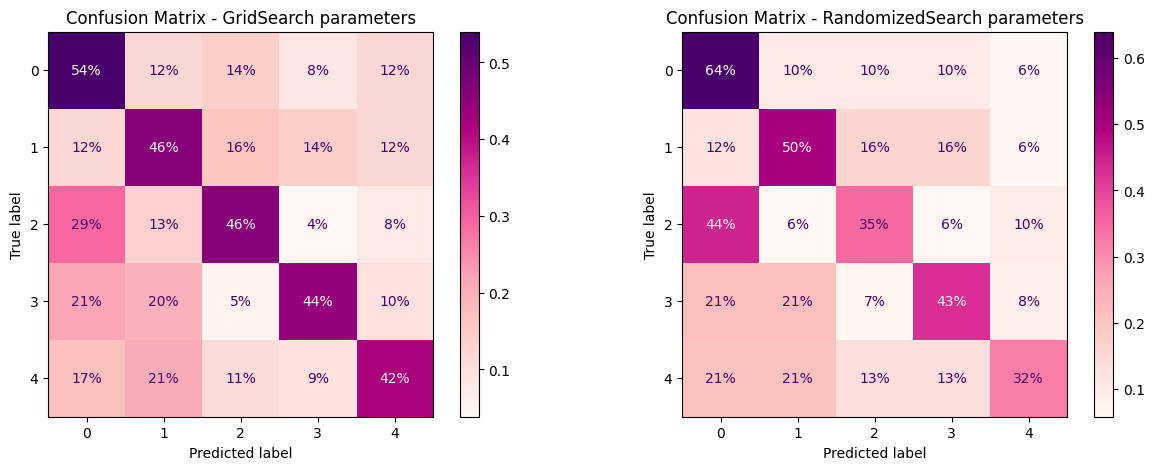

In [566]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axes =plt.subplots(1,2, figsize = (15,5))
cmgs = confusion_matrix(y_test, y_pred2, normalize='true')
ConfusionMatrixDisplay(cmgs, display_labels=np.unique(y_test)).plot(ax=axes[0], values_format='.0%', cmap='RdPu')
axes[0].set_title("Confusion Matrix - GridSearch parameters")

cmgs = confusion_matrix(y_test, y_pred1, normalize = 'true')
ConfusionMatrixDisplay(cmgs, display_labels=np.unique(y_test)).plot(ax=axes[1], values_format='.0%', cmap='RdPu')
axes[1].set_title("Confusion Matrix - RandomizedSearch parameters")
plt.show()

Parameters found by GridSearch peform best on 3/5 labels, achieving higher mean accuracy.

In [567]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.39      0.54      0.45        50
           1       0.39      0.46      0.42        50
           2       0.50      0.46      0.48        52
           3       0.60      0.44      0.51        61
           4       0.50      0.42      0.45        53

    accuracy                           0.46       266
   macro avg       0.48      0.46      0.46       266
weighted avg       0.48      0.46      0.46       266



In [568]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
report = pd.DataFrame()
report['f1_score'] = [f1_score(y_test, y_pred2, average='weighted')]
report['precision_score'] = [precision_score(y_test, y_pred2, average='weighted')]
report['recall_score'] = [recall_score(y_test, y_pred2, average='weighted')]
report['accuracy_score'] = [accuracy_score(y_test,y_pred2)]

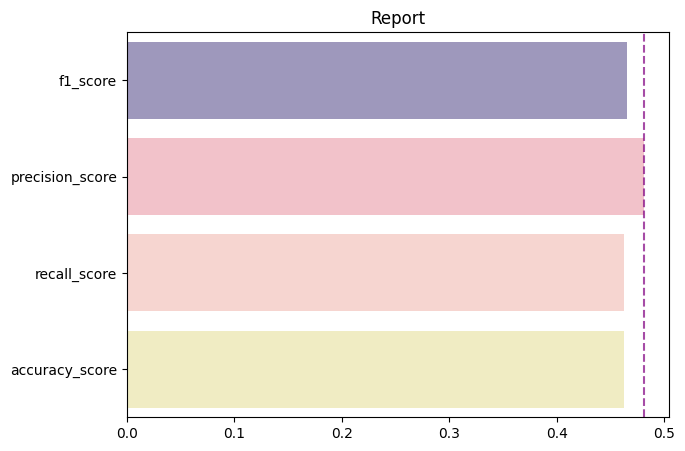

In [569]:
plt.figure(figsize=(7,5))
plt.title('Report')
sns.barplot(data=report,palette=['#9A92C2',
'#FABAC5',
'#FCD1CA',
'#F8F2BB',
'#C1DC95',
'#99C66F'], orient = 'h' );
plt.axvline(max(report.loc[0]), color = 'purple', linestyle = '--', alpha = 0.7);

Overall, the classifier achieves an accuracy of 46% on the test dataset, indicating that it correctly predicts the label for approximately 46% of the instances. The macro average F1-score is 0.46, indicating a similar overall performance across the different classes.

The precision represents the proportion of correctly predicted instances among those predicted as a particular class. The recall represents the proportion of correctly predicted instances among the total instances of that class. The F1-score combines precision and recall into a single metric, providing a balance between them.

In summary, the kNN classifier with 5 labels demonstrates moderate performance, as we expected given the dimension of the dataset.

### **Visualizing KNN**

In order to plot KNN we need X to be 2-dimensional, so we perform PCA on it and define Xp(2-dimensional version of X), from which X_train and X_test will be derived. Also, for the purpose of representation, scaling is not optimal, since it would be difficoult for us to acutally distinguish the neighbors, as they would be all in the same region, so we perform PCA on df, rather than the scaled version of it.

In [431]:
X = df.drop(['label'], axis = 1)
y = df['label']

In [432]:
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)

In [433]:
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2, random_state=42)
gs = GridSearchCV(KNeighborsClassifier(), {'n_neighbors' : np.arange(1,200)} , cv=7)
g_res = gs.fit(X_train, y_train)
g_res.best_params_

{'n_neighbors': 61}

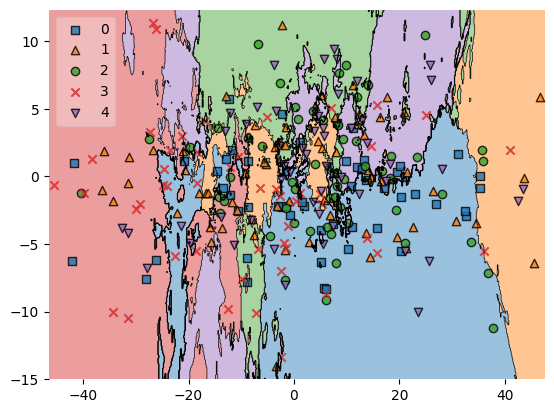

In [434]:
clf = KNeighborsClassifier(n_neighbors = 61)
clf.fit(X_train,y_train)
y_test = y_test.to_numpy()
plot_decision_regions(X_test, y_test, clf=clf, legend=2);

In [436]:
y_pred = clf.predict(X_test)
print('Accuracy on test: ' +str(accuracy_score(y_test, y_pred)))

Accuracy on test: 0.25


The performance of the model is not really high, as we decreased so much the number of features, but it's just for the purpose of representation. It is clear from the plot that the model 'guesses' the right class 25% of the time.

# RANDOM FOREST

As before we split the data in test and train sets and we try fitting the empty model on our data

In [16]:
X = featuresdf_red.drop('label', axis = 1)
y = featuresdf_red["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=43)
rf = RandomForestClassifier(random_state=43)
rf.fit(X_train,y_train)
y_pred0 = rf.predict(X_test)
print('Accuracy on test: ' +str(accuracy_score(y_test, y_pred0)))
results['RandomForest'].append(accuracy_score(y_test, y_pred0))

Accuracy on test: 0.4924812030075188


The performance of the model is already better than KNN, but we can increase it with hyperparameters tuning.

We will use these paramters for fine tuning:
- n_estimators: The number of decision trees in the Random Forest ensemble.
- max_depth: The maximum depth of each decision tree in the Random Forest.
- min_samples_split: The minimum number of samples required to split an internal node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.
- bootstrap: A flag indicating whether bootstrap samples should be used when building trees. 

Both max_depth and bootstrap are parameters that keep overfitting under control: by using bootstrap samples, the Random Forest algorithm introduces randomness and diversity in the training process. Each decision tree is trained on a different bootstrap sample, resulting in slight variations in the data seen by each tree. This variation helps to reduce overfitting and improve the overall predictive power of the Random Forest model. Fixing a max depth also prevents overfitting, howver we don't want to set to a finite value apriori since it would reduce too much the accuracy of the model.

These parameters control various aspects of the Random Forest algorithm. Adjusting these parameters allows for optimization of the Random Forest model to improve its performance.

In [571]:
n_estimators = [200,400,600]
max_depth = [None, 20, 50, 100]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [572]:
gs = GridSearchCV(RandomForestClassifier(random_state=43), {
                'criterion' : ['gini', 'log_loss', 'entropy'],
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,'n_estimators': n_estimators,
               'max_depth': max_depth, 'bootstrap': bootstrap}, verbose = 1, cv=5, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
g_res.best_params_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [53]:
rf = RandomForestClassifier(random_state=43, criterion='gini', min_samples_leaf=1, min_samples_split= 5, bootstrap=True, max_depth=20
                            , n_estimators=400)
rf.fit(X_train,y_train)
y_pred1 = rf.predict(X_test)
acc1 =accuracy_score(y_test, y_pred1)
print('Accuracy on test: ' +str(acc1))

Accuracy on test: 0.5037593984962406


After tuning all the parameters with gridsearch we got an increase in accuracy, we run RandomSearchCV

In [575]:
gs = RandomizedSearchCV(RandomForestClassifier(random_state=43), {
                'criterion' : ['gini', 'log_loss', 'entropy'],
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,'n_estimators': n_estimators,
               'max_depth': max_depth, 'bootstrap': bootstrap} , cv=5, n_iter=100, n_jobs=-1)
g_res = gs.fit(X_train, y_train)
g_res.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 50,
 'criterion': 'gini',
 'bootstrap': True}

In [648]:
rf = RandomForestClassifier(random_state=43, criterion='gini', min_samples_leaf=1, min_samples_split= 5, bootstrap=True, max_depth=50
                            , n_estimators=400)
rf.fit(X_train,y_train)
y_pred2 = rf.predict(X_test)
acc1 =accuracy_score(y_test, y_pred2)
print('Accuracy on test: ' +str(acc1))
results['RandomForest'].append(acc1)

Accuracy on test: 0.5037593984962406


Gridsearch and RandomSearch find the same optimal parameters, except for max_depth, which is lower for GS. Despite that, the accuracy achieved is the same both for RS and GS, we prefer to keep the model with the parameters found by the latter, since max depth is a parameter that keeps overfitting under control, the smaller max depth the smaller the overfitting. 

### **Model Evaluation**

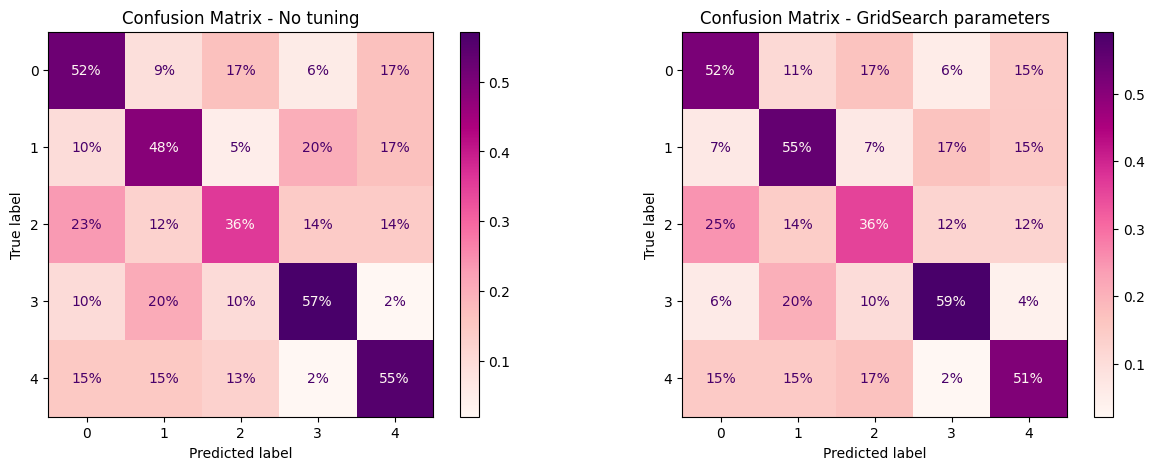

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axes =plt.subplots(1,2, figsize = (15,5))
cmgs = confusion_matrix(y_test, y_pred0, normalize='true')
ConfusionMatrixDisplay(cmgs, display_labels=np.unique(y_test)).plot(ax=axes[0], values_format='.0%', cmap='RdPu')
axes[0].set_title("Confusion Matrix - No tuning")

cmgs = confusion_matrix(y_test, y_pred1, normalize = 'true')
ConfusionMatrixDisplay(cmgs, display_labels=np.unique(y_test)).plot(ax=axes[1], values_format='.0%', cmap='RdPu')
axes[1].set_title("Confusion Matrix - GridSearch parameters")
plt.show()

We see that the model with tuned parameters slightly increased the accuracy on predictions of 2/5 labels, even tought the increase is small it led to overall accuracy improvement.

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        54
           1       0.52      0.55      0.53        60
           2       0.43      0.36      0.39        56
           3       0.58      0.59      0.59        49
           4       0.48      0.51      0.49        47

    accuracy                           0.50       266
   macro avg       0.50      0.51      0.50       266
weighted avg       0.50      0.50      0.50       266



In [57]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
report = pd.DataFrame()
report['f1_score'] = [f1_score(y_test, y_pred1, average='weighted')]
report['precision_score'] = [precision_score(y_test, y_pred1, average='weighted')]
report['recall_score'] = [recall_score(y_test, y_pred1, average='weighted')]
report['accuracy_score'] = [accuracy_score(y_test, y_pred1)]

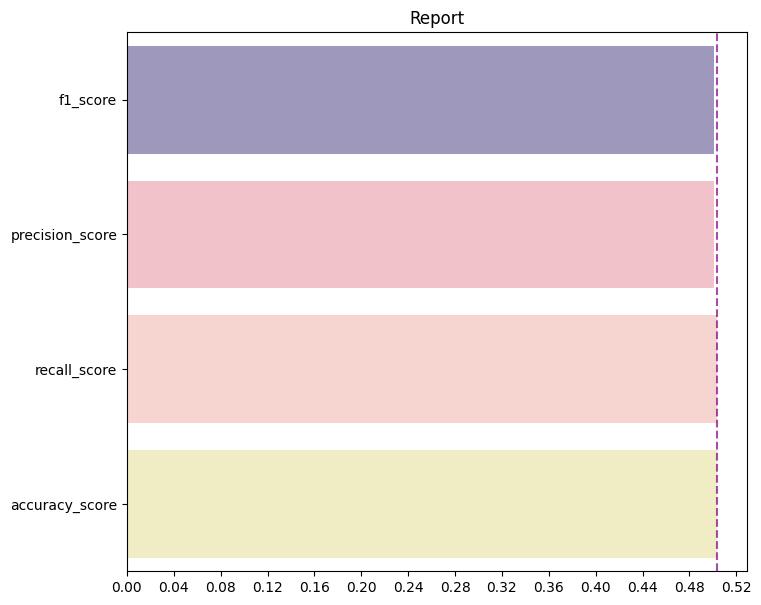

In [58]:
plt.figure(figsize=(8,7))
plt.title('Report')
sns.barplot(data=report,palette=['#9A92C2',
'#FABAC5',
'#FCD1CA',
'#F8F2BB',
'#C1DC95',
'#99C66F'], orient = 'h' );
plt.axvline(max(report.loc[0]), color = 'purple', linestyle = '--', alpha = 0.7);
plt.xticks(np.arange(0,0.55, step = 0.04));

### **Visualizing Random Forest**

We plot of the tree from our random forest, to visualize how these decision makers act

In [460]:
import matplotlib
from sklearn.tree import plot_tree

# Select one of the trees in the forest
tree = rf.estimators_[43]

# Plot the tree
plt.figure(figsize=(20,10), dpi=800)  # set plot size (denoted in inches)
plot_tree(tree, feature_names=featuresdf_red.columns, class_names=['0','1','2','3', '4'], filled=True)
plt.show()

# CONCLUSION

In [649]:
results

{'KNN': [0.42105263157894735, 0.462406015037594],
 'RandomForest': [0.4924812030075188, 0.5037593984962406]}

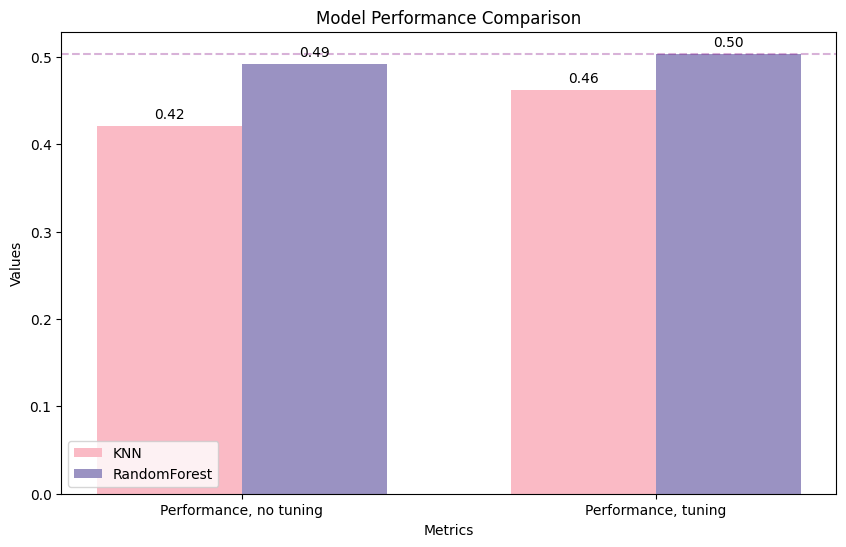

In [660]:
import matplotlib.pyplot as plt

data = results

keys = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots(figsize =(10,6))
bar_width = 0.35
index = range(len(values[0]))
colors = ['#FABAC5', '#9A92C2']
# Plotting the bars for each key
rects = []
for i in range(len(keys)):
    rects.append(ax.bar(index, values[i], bar_width, label=keys[i], color=colors[i]))
    index = [x + bar_width for x in index]

# Adding the values on top of the bars
for rect in rects:
    for bar in rect:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Configuring the plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Model Performance Comparison')
ax.set_xticks([r + bar_width / 2 for r in range(len(values[0]))])
ax.set_xticklabels(['Performance, no tuning', 'Performance, tuning'])
plt.axhline(max(values[1]), color = 'purple', linestyle = '--', alpha = 0.3);
# Adding a legend
ax.legend(loc = 'lower left')

plt.show()


For the kNN model, the accuracy before parameter tuning is 0.421 (42.11%), and after tuning, it improves to 0.462 (46.24%). This indicates that parameter tuning had a positive impact on the kNN model's accuracy, resulting in an improvement.

On the other hand, for the Random Forest model, the accuracy before parameter tuning is 0.492 (49.24%), and after tuning, it increases to 0.504 (50.38%). Similar to kNN, parameter tuning has positively affected the Random Forest model's accuracy, resulting in an improvement.

Comparing the two models, we observe that the Random Forest model achieves higher accuracy both before and after parameter tuning compared to the kNN model. This suggests that the Random Forest model is the best model for this dataset.

kNN model accuracy increased more after tuning. This indicates that the selection of optimal hyperparameters, such as the number of neighbors and the weight function, significantly enhanced the kNN model's ability to capture patterns and make accurate predictions. While the Random Forest model did benefit from parameter optimization, the improvement in accuracy was comparatively smaller than that of the kNN model.

This observation suggests that kNN is more sensitive to hyperparameter tuning, where small adjustments in the number of neighbors or the choice of weight function can have a substantial impact on its performance. On the contrary, the Random Forest model is inherently robust due to its ensemble nature, and it may not exhibit as significant changes in performance with parameter variations.

Despite the kNN model's greater responsiveness to hyperparameter tuning, the overall superiority of the Random Forest model in terms of accuracy suggests it is more suitable for the dataset.

In [59]:
# Get numerical feature importances
feature_importances = pd.DataFrame()
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances['feature'] = ['feature_' +str(feature) for feature in featuresdf_red.drop('label',axis =1).columns]
feature_importances['value'] = [importance  for importance in importances]
# Sort the feature importances by most important first
feature_importances

feature     value
0  feature_0  0.091637
1  feature_1  0.094240
2  feature_2  0.094606
3  feature_3  0.128119
4  feature_4  0.124703
5  feature_5  0.105391
6  feature_6  0.096204
7  feature_7  0.089959
8  feature_8  0.088450
9  feature_9  0.086692

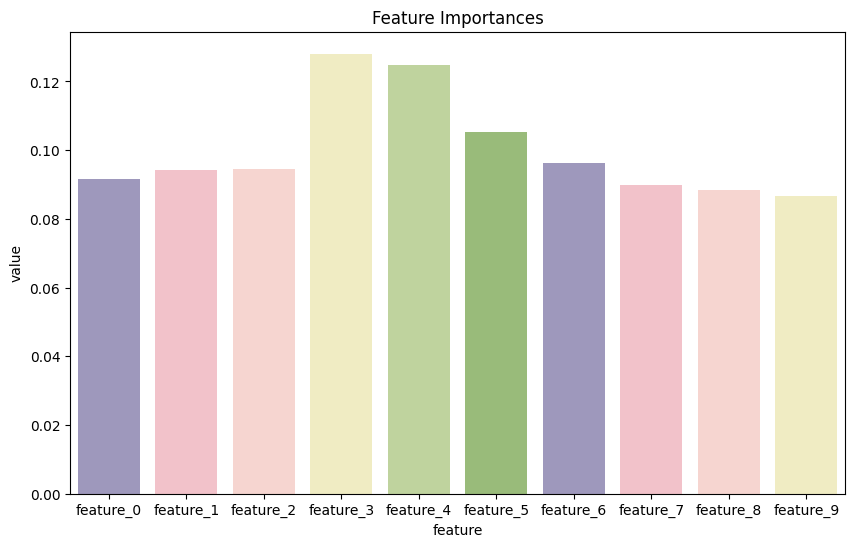

In [60]:
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
sns.barplot(y='value',x='feature',data=feature_importances,palette=['#9A92C2',
'#FABAC5',
'#FCD1CA',
'#F8F2BB',
'#C1DC95',
'#99C66F'] );


This graph displays feature importances in the Random Forest model, it provides valuable insights into the relevance and contribution of each feature in predicting the target variable.

Features with higher importances indicate their stronger influence in the decision-making process of the Random Forest algorithm. The feature importances graph allows us to gain a better understanding of the underlying patterns and relationships within the data.

# RANDOM FOREST ON TEST FEATURES

In [17]:
test_features = pd.read_csv('mldata_0003158575.TEST_FEATURES')

In [18]:
test_features.drop('id', axis =1, inplace=True)

In [21]:
X = pipeline.fit_transform(test_features)
rf = RandomForestClassifier(random_state=43, criterion='gini', min_samples_leaf=1, min_samples_split= 5, bootstrap=True, max_depth=20
                            , n_estimators=400)
rf.fit(X_train, y_train)
y = rf.predict(X)

In [22]:
np.savetxt('predict.txt', y, fmt = '%d')

*Agnese Adorante, 3158575*